In [1]:
import numpy as np
import matplotlib.colors as mc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import graph_tool as gt
import networkx as nx
import os
import random
import csv
import graphviz as gv
from PIL import Image
import pickle 
import math


In [2]:
#plot stats here UPDATE FOR MULTIPLE SIMS
plot1_dict = {}
plot2_dict = {}
plot3_dict = {}
plot4_dict = {}

def vl_prob(viral_load):
    # update with implementation similar to what Dan has in testing paper
    if viral_load < 3:
        return 0.0
    elif viral_load >= 6:
        return 1.0
    else:
        return (math.log10(viral_load) - math.log10(3))/math.log10(2) # check on this


In [3]:
times = list(np.arange(0, 1000))

for sim in range(10):
    #load in pickle files
    exp_name = ['static_SIR', 'static_VL', 'temporal_SIR', 'temporal_VL']
    tmax = [48, 48, 67, 67]
    edge_lists = []
    node_lists = []

    edge_lists.append(pickle.load( open( "output/" + exp_name[0] + "/run_" + str(sim) + "/edge_list.p", "rb" ) ))
    node_lists.append(pickle.load( open( "output/" + exp_name[0] + "/run_" + str(sim) + "/node_list.p", "rb" ) ))


    edge_lists.append(pickle.load( open( "output/" + exp_name[1] + "/run_" + str(sim) + "/edge_list.p", "rb" ) ))
    node_lists.append(pickle.load( open( "output/" + exp_name[1] + "/run_" + str(sim) + "/node_list.p", "rb" ) ))


    edge_lists.append(pickle.load( open( "output/" + exp_name[2] + "/run_" + str(sim) + "/edge_list.p", "rb" ) ))
    node_lists.append(pickle.load( open( "output/" + exp_name[2] + "/run_" + str(sim) + "/node_list.p", "rb" ) ))


    edge_lists.append(pickle.load( open( "output/" + exp_name[3] + "/run_" + str(sim) + "/edge_list.p", "rb" ) ))
    node_lists.append(pickle.load( open( "output/" + exp_name[3] + "/run_" + str(sim) + "/node_list.p", "rb" ) ))
    
    
    #SET UP FOR PLOT 1
    temp_dict = {}
    for i in [0,2]:
        mean_degree = []
        time = []
        for ts in range(1000):
            index = ts
            if len(edge_lists[i]) == 1:
                index = 0

            G = nx.Graph()
            G.add_nodes_from(list(node_lists[i].keys()))
            G.add_edges_from(edge_lists[i][index])
        
            mean_degree.append((2*len(G.edges()))/len(G.nodes()))
        
        
        temp_dict[i] = list(mean_degree)
    plot1_dict[sim] = dict(temp_dict)
    
    #SET UP FOR PLOT 2
    temp_dict2 = {}
    for i in range(len(exp_name)):
    
        vl_inf = []
        for ts in range(1000):
            vl = 0
            for node in node_lists[i].keys():
                if node_lists[i][node]['infect_time'] <= ts and ts < node_lists[i][node]['remove_time']:
                    viral_load = node_lists[i][node]['viral_loads'][ts - node_lists[i][node]['infect_time']]
                    vl = vl + viral_load
                
            vl_inf.append(vl/len(node_lists[i].keys()))
        temp_dict2[exp_name[i]] = list(vl_inf)
    plot2_dict[sim] = dict(temp_dict2)
    
    #SET UP FOR PLOT 3
    temp_dict3 = {}
    for i in range(len(exp_name)):
        prob_inf = []
        for ts in range(1000):
            inf = 0
            prob = 0
            for node in node_lists[i].keys():
                if node_lists[i][node]['infect_time'] <= ts and ts < node_lists[i][node]['remove_time']:
                    viral_load = node_lists[i][node]['viral_loads'][ts - node_lists[i][node]['infect_time']]
                    inf = inf + 1
                    prob = prob + vl_prob(viral_load)
                
            prob_inf.append(prob/len(node_lists[i].keys()))
        temp_dict3[exp_name[i]] = list(prob_inf)
    plot3_dict[sim] = dict(temp_dict3)
    
    #SET UP FOR PLOT 4
    temp_dict4 = {}
    for i in range(len(exp_name)):
        frac_inf = []
        for ts in range(1000):
            inf = 0
            for node in node_lists[i].keys():
                if node_lists[i][node]['infect_time'] <= ts and ts <= node_lists[i][node]['remove_time']:
                    inf = inf + 1
            frac_inf.append(inf/len(node_lists[i].keys()))
        temp_dict4[exp_name[i]] = list(frac_inf)
    plot4_dict[sim] = dict(temp_dict4)

In [4]:
# do averages here. 
static_mean_deg = []
tempor_mean_deg = []

print(plot1_dict[0].keys())
for i in range(1000):
    
    static_sum = 0
    temp_sum = 0
    for key in plot1_dict[0].keys():
        static_sum = static_sum + plot1_dict[key][0][i]
        temp_sum = temp_sum + plot1_dict[key][2][i]
    static_mean_deg.append(static_sum/10)
    tempor_mean_deg.append(temp_sum/10)
print('Done.')
print(plot2_dict.keys(), plot2_dict[0].keys())
static_SIR_p2 = []
static_VL_p2 = []
temp_SIR_p2 = []
temp_VL_p2 = []

for i in range(1000):
    static_S = 0
    temp_S = 0
    static_V = 0
    temp_V = 0
    for key in plot2_dict.keys():
        static_S = static_S + plot2_dict[key]['static_SIR'][i]
        static_V = static_V + plot2_dict[key]['static_VL'][i]
        
        temp_S = temp_S + plot2_dict[key]['temporal_SIR'][i]
        temp_V = temp_V + plot2_dict[key]['temporal_VL'][i]
        
    static_SIR_p2.append(static_S/10)
    static_VL_p2.append(static_V/10)
    temp_SIR_p2.append(temp_S/10)
    temp_VL_p2.append(temp_V/10)
        
print('Done.')

print(plot3_dict.keys(), len(plot3_dict[0]['static_SIR']))
static_SIR_p3 = []
static_VL_p3 = []
temp_SIR_p3 = []
temp_VL_p3 = []

for i in range(1000):
    
    static_S = 0
    temp_S = 0
    static_V = 0
    temp_V = 0
    for key in plot3_dict.keys():
        static_S = static_S + plot3_dict[key]['static_SIR'][i]
        static_V = static_V + plot3_dict[key]['static_VL'][i]
        
        temp_S = temp_S + plot3_dict[key]['temporal_SIR'][i]
        temp_V = temp_V + plot3_dict[key]['temporal_VL'][i]
        
    static_SIR_p3.append(static_S/10)
    static_VL_p3.append(static_V/10)
    temp_SIR_p3.append(temp_S/10)
    temp_VL_p3.append(temp_V/10)
print('Done.')

print(plot4_dict.keys(), plot4_dict[0].keys())
static_SIR_p4 = []
static_VL_p4 = []
temp_SIR_p4 = []
temp_VL_p4 = []

for i in range(1000):
    
    static_S = 0
    temp_S = 0
    static_V = 0
    temp_V = 0
    for key in plot4_dict.keys():
        static_S = static_S + plot4_dict[key]['static_SIR'][i]
        static_V = static_V + plot4_dict[key]['static_VL'][i]
        
        temp_S = temp_S + plot4_dict[key]['temporal_SIR'][i]
        temp_V = temp_V + plot4_dict[key]['temporal_VL'][i]
        
    static_SIR_p4.append(static_S/10)
    static_VL_p4.append(static_V/10)
    temp_SIR_p4.append(temp_S/10)
    temp_VL_p4.append(temp_V/10)
        
print('Done.')

dict_keys([0, 2])
Done.
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) dict_keys(['static_SIR', 'static_VL', 'temporal_SIR', 'temporal_VL'])
Done.
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 1000
Done.
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) dict_keys(['static_SIR', 'static_VL', 'temporal_SIR', 'temporal_VL'])
Done.


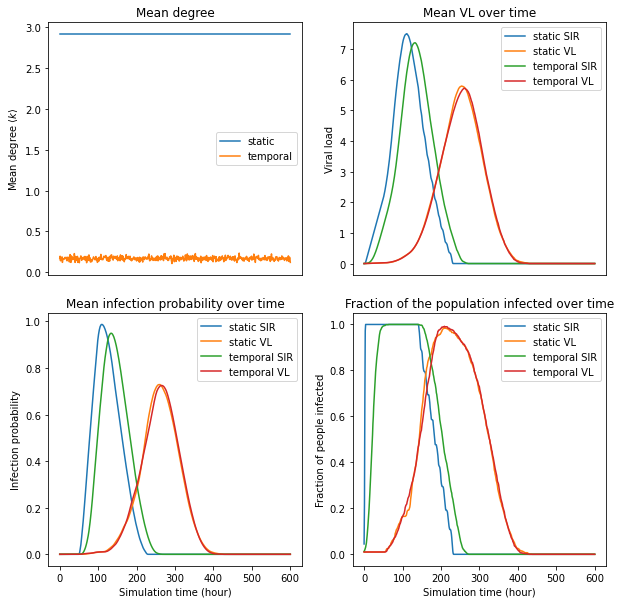

In [9]:
# do that plotting UPDATE - INCLUDE LOOPS FOR EACH SIMULATION TO AVERAGE ACROSS THEM ALL. 

time_steps = 'hour'
plt.figure(figsize = (10,10))
#--------------------------------------------------------------------------
plt.subplot(221)
plt.plot(times[:601], static_mean_deg[:601], label = exp_name[0].split('_')[0])
plt.plot(times[:601], tempor_mean_deg[:601], label = exp_name[2].split('_')[0])

plt.xticks([], [])
#plt.xlabel('Simulation time (' + time_steps + ')')
plt.ylabel('Mean degree ' + r'$\langle k \rangle$')
plt.title('Mean degree')
plt.legend()
#--------------------------------------------------------------------------
plt.subplot(222)
        
plt.plot(times[:601], static_SIR_p2[:601], label = 'static SIR')
plt.plot(times[:601], static_VL_p2[:601], label = 'static VL')
plt.plot(times[:601], temp_SIR_p2[:601], label = 'temporal SIR')
plt.plot(times[:601], temp_VL_p2[:601], label = 'temporal VL')

plt.xticks([], [])
#plt.xlabel('Simulation time (' + time_steps + ')')
plt.ylabel('Viral load')
plt.title('Mean VL over time')
plt.legend()
#--------------------------------------------------------------------------
plt.subplot(223)
#do this how we talked about with Owen

plt.plot(times[:601], static_SIR_p3[:601], label = 'static SIR')
plt.plot(times[:601], static_VL_p3[:601], label = 'static VL')
plt.plot(times[:601], temp_SIR_p3[:601], label = 'temporal SIR')
plt.plot(times[:601], temp_VL_p3[:601], label = 'temporal VL')

plt.xlabel('Simulation time (' + time_steps + ')')
plt.ylabel('Infection probability')
plt.title('Mean infection probability over time')
plt.legend()
#--------------------------------------------------------------------------
plt.subplot(224)

plt.plot(times[:601], static_SIR_p4[:601], label = 'static SIR')
plt.plot(times[:601], static_VL_p4[:601], label = 'static VL')
plt.plot(times[:601], temp_SIR_p4[:601], label = 'temporal SIR')
plt.plot(times[:601], temp_VL_p4[:601], label = 'temporal VL')
            
plt.xlabel('Simulation time (' + time_steps + ')')
plt.ylabel('Fraction of people infected')
plt.title('Fraction of the population infected over time')
plt.legend()

plt.subplots_adjust(hspace = 0.15)
#plt.suptitle('Statistics')
plt.savefig('stats_final.pdf', bbox_inches = 'tight')
#plt.close()